In [65]:
#Importo las librerías que requiero
import pandas as pd
import ast


In [66]:
#Extraigo los archivos requeridos para el análisis de datos
df_credits = pd.read_csv(r'C:\Users\Patricia\Downloads\datasets-20230630T131824Z-001\credits.csv')
df_movie_csv = pd.read_csv('movies_dataset.csv')
df_movie1 = pd.read_excel('movies_dataset1.xlsx')
df_movie_excel = pd.read_excel('movies_dataset.xlsx')


C:\Users\Patricia\AppData\Local\Temp\ipykernel_11452\2343205725.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_movie_csv = pd.read_csv('movies_dataset.csv')


In [67]:
#Genero la visualizacion del df que tiene la columna de director para poder anexarla luego 
df_credits.head(5)


,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [68]:
#Como no logro generar que me lea directamente crew porque hay columnas con formato no json en cast lo elimina la columna
df_credits.drop(columns={'cast'})


,crew,id
0,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...
45471,"[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


In [69]:
# Evaluar la columna 'crew' como una expresión literal de Python
df_credits['crew'] = df_credits['crew'].apply(ast.literal_eval) #Para ello uso la librería ast de python 

# Función para buscar el director en la lista de diccionarios
def obtener_director(crew_list):
    for crew_member in crew_list:
        if crew_member['job'] == 'Director':
            return crew_member['name']
    return None

# Extraer el nombre del director en una nueva columna 'director' y omitir los casos vacíos
df_credits['director'] = df_credits['crew'].apply(obtener_director)

# Filtrar las filas con nombre de director no vacío
df_credits = df_credits.dropna(subset=['director'])

# Imprimir el DataFrame con las columnas 'crew', 'id' y 'director'
print(df_credits[['crew', 'id', 'director']])

                                                    crew      id   
0      [{'credit_id': '52fe4284c3a36847f8024f49', 'de...     862  \
1      [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...    8844   
2      [{'credit_id': '52fe466a9251416c75077a89', 'de...   15602   
3      [{'credit_id': '52fe44779251416c91011acb', 'de...   31357   
4      [{'credit_id': '52fe44959251416c75039ed7', 'de...   11862   
...                                                  ...     ...   
45471  [{'credit_id': '5894a97d925141426c00818c', 'de...  439050   
45472  [{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...  111109   
45473  [{'credit_id': '52fe4776c3a368484e0c8387', 'de...   67758   
45474  [{'credit_id': '533bccebc3a36844cf0011a7', 'de...  227506   
45475  [{'credit_id': '593e676c92514105b702e68e', 'de...  461257   

               director  
0         John Lasseter  
1          Joe Johnston  
2         Howard Deutch  
3       Forest Whitaker  
4         Charles Shyer  
...                 ...  
4

In [70]:
#Como existen 3 archviso que se llaman movies_datasets de los cuales 2 de ellos son archvos excel verifico si contienen los mismos datos
evaluacion_identidad = df_movie_csv.equals(df_movie1)
print(evaluacion_identidad)

False


In [71]:
#Otra forma de verificar si los datos son iguales. 
are_equal = (df_movie_excel == df_movie1).all().all()
print(are_equal)  # True

False


In [72]:
#De acuerdo con la metodología planteada por el empleador (cliente-Henry), se eliminan las columnas. 
#Para no repetir codigo utilizo un ciclo for que itere sobre cada dataframe
columnasEliminar = ['video', 'imdb_id', 'adult', 'original_title', 'poster_path', 'homepage'] 

for df in [df_movie1, df_movie_csv, df_movie_excel]:
    df.drop(columns=columnasEliminar, inplace=True)

In [73]:
#El empleador solicita que normalicemos los datos aplicando 0 a los valores nulos de las columnas revenue y budget,
#para lo cual también utilizo un ciclo for.

for df in [df_movie1, df_movie_csv, df_movie_excel]:
    df['revenue'].fillna(0, inplace=True)
    df['budget'].fillna(0, inplace=True)

In [74]:
#Se me solicita que elimine los valores nulos asociados a la columna "release date", para ello nuevamento itero con un
#ciclo for
for df in [df_movie1, df_movie_csv, df_movie_excel]:
    df.dropna(subset=['release_date'], inplace=True)

In [75]:
#Garantizo que se hayan generado los cambios de eliminación de valores nulos
print(df_movie1['release_date'].isnull().sum())
print(df_movie_csv['release_date'].isnull().sum())
print(df_movie_excel['release_date'].isnull().sum())

0
0
0


In [76]:
#Adicionalmente el cliente solicita que se transformen los datos de "año de lanzamiento" en la columna "release year"
# y coloquemos directamente a formato año y generemos otra columna con el año de lanzamiento.

for df in [df_movie1, df_movie_csv, df_movie_excel]:
    df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d', errors='coerce')
    df['release_year'] = df['release_date'].dt.year.astype(float).fillna(0).astype(int)

    # Mostrar los resultados
    print(df[['release_date', 'release_year']].head(3))

  release_date  release_year
0   1995-10-30          1995
1   1995-12-15          1995
2   1995-12-22          1995
  release_date  release_year
0   1995-10-30          1995
1   1995-12-15          1995
2   1995-12-22          1995
  release_date  release_year
0   1995-10-30          1995
1   1995-12-15          1995
2   1995-12-22          1995


In [77]:
#Evalúo el tipo de dato 
print(df_movie1['release_date'].dtype)
print(df_movie_csv['release_date'].dtype)
print(df_movie_excel['release_date'].dtype)


print(df_movie1['release_year'].dtype)
print(df_movie_csv['release_year'].dtype)
print(df_movie_excel['release_year'].dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]
int32
int32
int32


In [78]:
#La columna genero está anidada asi que la desanido
import json

# Función para extraer los nombres de los géneros
def extract_genre_names(genres):
    genre_list = json.loads(genres.replace("'", "\""))
    return ', '.join([genre['name'] for genre in genre_list])

# Reemplazar comillas simples por comillas dobles y convertir la columna 'genres' en cadenas de texto
for df in [df_movie1, df_movie_csv, df_movie_excel]:
    df['genres'] = df['genres'].apply(lambda x: x.replace("'", "\""))

# Aplicar la función para extraer los nombres de los géneros
for df in [df_movie1, df_movie_csv, df_movie_excel]:
    df['genres'] = df['genres'].apply(extract_genre_names)

# Mostrar el DataFrame con la nueva columna 'genres'
print(df_movie1['genres'])


0         Animation, Comedy, Family
1        Adventure, Fantasy, Family
2                   Romance, Comedy
3            Comedy, Drama, Romance
4                            Comedy
                    ...            
45460        Drama, Action, Romance
45462                         Drama
45463       Action, Drama, Thriller
45464                              
45465                              
Name: genres, Length: 45379, dtype: object


In [79]:
#Se nos solicita que hagamos una columna con el retorno de ganancia "return" para ello debemos dividir ganancias "revenue"/inversión o presupuesto
#que seria la columna #budget#
for df in [df_movie1, df_movie_csv, df_movie_excel]:
    df['return'] = 0  # Inicializamos la columna return con ceros
    df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
    df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
    for index, row in df.iterrows():
        if row['budget'] != 0 and row['revenue'] != 0:
            df.loc[index, 'return'] = row['revenue'] / row['budget']

In [80]:
#Se itera sobre cada uno de los DF para intentar desanidar, no se pudo hacer con bucle for porque generaba un error
#aparentemente el problema está en el documento csv

# Desanidar la columna 'belongs_to_collection'
df_movie1['belongs_to_collection'] = df_movie1['belongs_to_collection'].apply(lambda x: ast.literal_eval(x)['name'] if (pd.notna(x) and isinstance(x, str)) else '')

# Desanidar la columna 'production_companies'
df_movie1['production_companies'] = df_movie1['production_companies'].apply(lambda x: ', '.join([company['name'] for company in ast.literal_eval(x)]) if (pd.notna(x) and isinstance(x, str)) else '')

# Mostrar los resultados
print(df_movie1[['belongs_to_collection', 'production_companies']].head(3))

       belongs_to_collection   
0       Toy Story Collection  \
1                              
2  Grumpy Old Men Collection   

                                production_companies  
0                            Pixar Animation Studios  
1  TriStar Pictures, Teitler Film, Interscope Com...  
2                       Warner Bros., Lancaster Gate  


In [81]:
# Desanidar la columna 'belongs_to_collection'
df_movie_excel['belongs_to_collection'] = df_movie_excel['belongs_to_collection'].apply(lambda x: ast.literal_eval(x)['name'] if (pd.notna(x) and isinstance(x, str)) else '')

# Desanidar la columna 'production_companies'
df_movie_excel['production_companies'] = df_movie_excel['production_companies'].apply(lambda x: ', '.join([company['name'] for company in ast.literal_eval(x)]) if (pd.notna(x) and isinstance(x, str)) else '')

# Mostrar los resultados
print(df_movie_excel[['belongs_to_collection', 'production_companies']].head(3))

       belongs_to_collection   
0       Toy Story Collection  \
1                              
2  Grumpy Old Men Collection   

                                production_companies  
0                            Pixar Animation Studios  
1  TriStar Pictures, Teitler Film, Interscope Com...  
2                       Warner Bros., Lancaster Gate  


In [82]:
#Se evalúa el documento csv aparentemente existen datos vacíos que impiden leerse bien
def parse_json(value):
    try:
        if pd.notna(value) and isinstance(value, str) and value != '' and value != '[]':
            json_data = json.loads(value)
            if isinstance(json_data, dict) and 'name' in json_data:
                return json_data['name']
            elif isinstance(json_data, list):
                return ', '.join([company['name'] for company in json_data])
        return ''  # Agregar esta línea para manejar valores vacíos
    except Exception:
        return ''

In [83]:
# Convertir los ID a cadena de texto en df_credits
df_credits['id'] = df_credits['id'].astype(str)

# Convertir los ID a cadena de texto en los otros dataframes
df_movie1['id'] = df_movie1['id'].astype(str)
df_movie_csv['id'] = df_movie_csv['id'].astype(str)
df_movie_excel['id'] = df_movie_excel['id'].astype(str)

# Realizar la combinación por ID
df_movie1 = pd.merge(df_movie1, df_credits[['id', 'director']], on='id', how='left')
df_movie_csv = pd.merge(df_movie_csv, df_credits[['id', 'director']], on='id', how='left')
df_movie_excel = pd.merge(df_movie_excel, df_credits[['id', 'director']], on='id', how='left')


In [84]:
#Se convinan los 3 df
combined_df = pd.concat([df_movie1, df_movie_csv, df_movie_excel], ignore_index=True)
combined_df = combined_df.drop_duplicates() #Elimino duplicados
combined_df.to_csv('combined_movies.csv', index=False) #Convierto a csv, no exporto porque se exporto solo


EDA

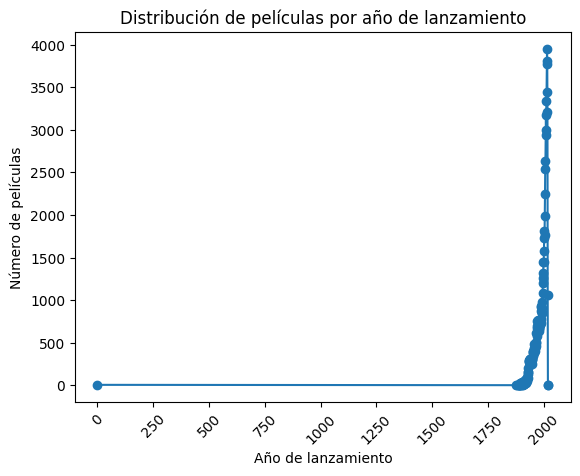

In [85]:
import matplotlib.pyplot as plt

release_years = combined_df['release_year'].value_counts().sort_index().index
movie_counts = combined_df['release_year'].value_counts().sort_index().values

plt.plot(release_years, movie_counts, marker='o', linestyle='-')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de películas')
plt.title('Distribución de películas por año de lanzamiento')
plt.xticks(rotation=45)
plt.show()

#Se evidencia que la mayor cantidad de películas está entre el año 1999 aproximadamente y 2000

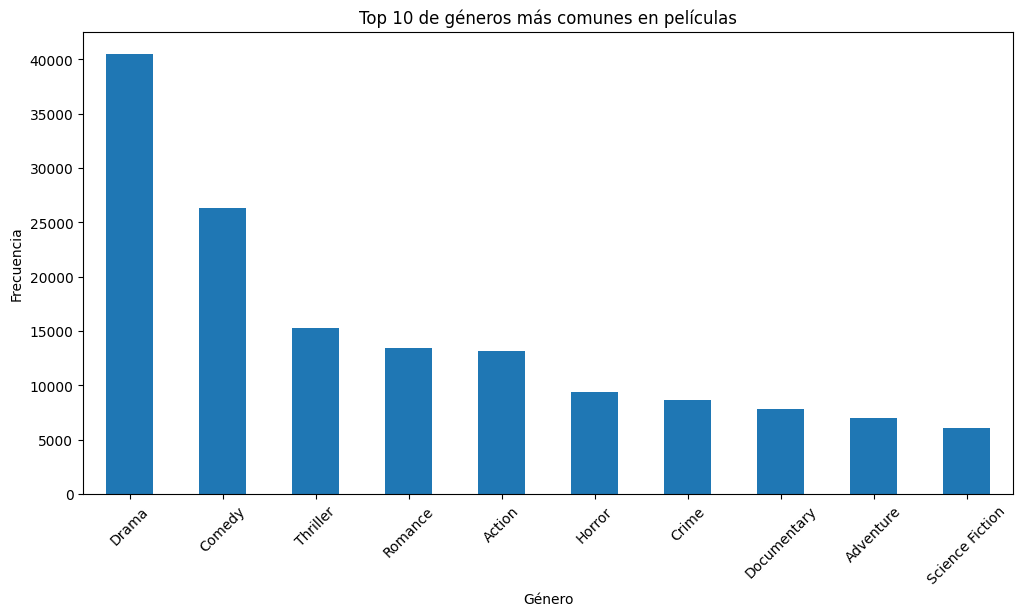

In [92]:
#Genero una grafica con el top 10 de género de peliculas mas frecuentes en el dataset
# Filtrar los registros que tienen género no vacío
combined_df_filtered = combined_df[combined_df['genres'].notnull()]

# Obtener la frecuencia de los géneros de películas
genres_counts = combined_df_filtered['genres'].str.split(',').explode().str.strip().value_counts().head(10)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
genres_counts.plot(kind='bar')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.title('Top 10 de géneros más comunes en películas')
plt.xticks(rotation=45)
plt.show()


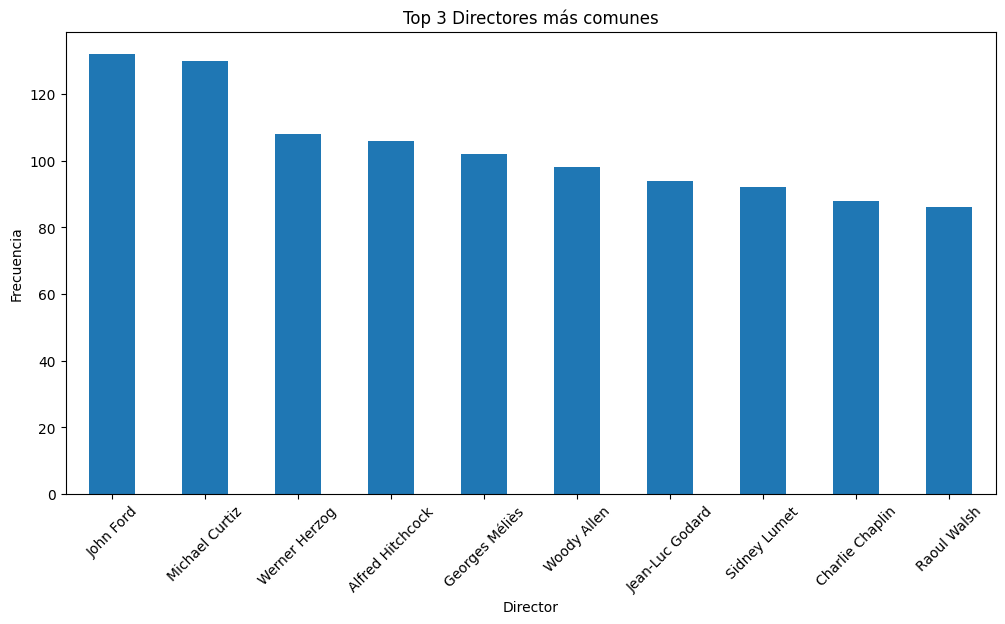

In [95]:
# Decido buscar cuales son los directores más comunes en el datasets asi que:
# Primero Obtenemos la frecuencia de los directores
directors_freq = combined_df['director'].value_counts().head(10)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
directors_freq.plot(kind='bar')
plt.xlabel('Director')
plt.ylabel('Frecuencia')
plt.title('Top 3 Directores más comunes')
plt.xticks(rotation=45)
plt.show()

In [88]:
#Genero el modelo de recomendacion de peliculas en la Api, lo hago por nube de palabras para que genere una relación entre titulos
#porque mi memoria computacional no me permitió de otra forma

import nltk

nltk.download('punkt')

# Obtener los títulos de las películas como una lista de conjuntos de palabras clave
titles = [set(title.split()) for title in combined_df['title'].astype(str).tolist()]

# Función para calcular la similitud de Jaccard entre dos conjuntos de palabras clave
def calculate_jaccard_similarity(set1, set2):
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    return len(intersection) / len(union)

# Función para obtener recomendaciones basadas en un título específico
def get_recommendations_based_on_title(title, titles, n_recommendations=5):
    # Encontrar el conjunto de palabras clave del título de referencia
    reference_set = set(title.split())

    # Calcular la similitud de Jaccard entre el título de referencia y todos los demás títulos
    similarity_scores = [calculate_jaccard_similarity(reference_set, title_set) for title_set in titles]

    # Obtener los índices de los títulos más similares
    top_indices = sorted(range(len(similarity_scores)), key=lambda i: similarity_scores[i], reverse=True)[1:n_recommendations+1]

    # Obtener los títulos recomendados
    recommended_titles = [combined_df['title'].iloc[index] for index in top_indices]

    return recommended_titles

# Ejemplo de uso: obtener recomendaciones para un título específico
title = "The Dark Knight"
recommended_titles = get_recommendations_based_on_title(title, titles)
print(recommended_titles)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Patricia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight Rises', 'The Dark Knight Rises']
